# Read figures and dataframes of data

Now that the images have been previously uploaded; the next stage is to <br>
read the images, as well as the pandas dataframes with the metadata information. <br>

IMPORTANT: All csv files of the data information for nih-cxr can be found here: <br>
https://nihcc.app.box.com/v/ChestXray-NIHCC/folder/223604149466

In [1]:
 #Import necessary modules
import os
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
plt.rcParams['figure.figsize'] = [20, 12]

### Set the path to here

Make sure the setup the paths properly!

In [2]:
#Path to assign tests (copy path directly)
test_path = r"D:\Python_Projects\CS236-Final-Proj\test"

#Set the path to this working directory
os.chdir(test_path)
print(os.getcwd())

import sys
#Append the path the src folder
sys.path.append(r'D:\Python_Projects\CS236-Final-Proj\src')

D:\Python_Projects\CS236-Final-Proj\test


### Import the necessary module for downloading

Note for this: EVERYTIME There is a change inside the download <br>
the changes inside the file would only be shown if the jupyter kernel is restarted. <br>


In [3]:
# Import the necessary modules
from utils import CXReader, DfReader

### Set the data path

In [4]:
# Create the data path
data_path = os.path.join(test_path, os.pardir, "data")

### Get the dataframes of the data
First, lets obtain the dataframes for the data and check that all metadata <br>
information has been set up properly. <br>

In [5]:
#Create a dataframe compiler
df_compiler = DfReader()

#set the path and retrieve the dataframes
df_compiler.set_folder_path(data_path)

#Get the dataframe holder and names
dfs_holder, dfs_names = df_compiler.get_dfs()

100%|█████████▉| 112121/112124 [00:00<00:00, 618403.88it/s]

The file: miccai2023_nih-cxr-lt_labels_test.csv has been retrieved


100%|██████████| 112124/112124 [00:00<00:00, 231162.87it/s]

The file: miccai2023_nih-cxr-lt_labels_train.csv has been retrieved
The file: miccai2023_nih-cxr-lt_labels_val.csv has been retrieved


### Print the first head 10 for each dataframe.
Now, looking at the prints, the first dataframe would be for test, the second <br>
is for train and the third is for validation. <br>

In [6]:
#Print the first 10 elements for test dataframe
print(dfs_holder[0].head(10))

#Print the first 10 elements for train dataframe
print(dfs_holder[1].head(10))

#Print the first 10 elements for validation dataframe
print(dfs_holder[2].head(10))

                 id  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00000013_000.png            0             0              0      0   
1  00000013_001.png            0             0              0      0   
2  00000013_002.png            0             0              0      0   
3  00000013_003.png            0             0              0      0   
4  00000013_004.png            0             0              0      0   
5  00000013_005.png            0             0              0      0   
6  00000013_006.png            0             0              0      0   
7  00000013_007.png            0             0              0      0   
8  00000013_008.png            0             0              0      0   
9  00000013_009.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  ...  \
0         0          0         0       0             0  ...   
1         0          1         0       0             0  ...   
2         0       

# Read the images

The dataframe contains key information as the following: <br>
1. Name of the png file to be used. <br>
2. All labels regarding the the image condition. <br>
3. Last column of which patient id it was the conditions from. <br>

This is amazing! Since we can load the datasets properly now to be used for any baseline models.

In [7]:
# Get the device if cuda or not
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Define a transformations for the VGGnet16 (requires a 224,224)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

#Create datasets and dataloaders
test_dataset = CXReader(data_path=data_path, dataframe=dfs_holder[0], transform=transform, device=device)
train_dataset = CXReader(data_path=data_path, dataframe=dfs_holder[1], transform=transform, device=device)
val_dataset = CXReader(data_path=data_path, dataframe=dfs_holder[2], transform=transform, device=device)

### Create a code that plots an image

In [8]:
def show_image(image, name_img: str):
    """
    Instance method that would plot an
    image to see if the dataset is properly set.
    """
    f, ax1 = plt.subplots(1, 1)
    ax1.set_title('Desired image ' + name_img)
    ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')

### Sample a train, test, and val image and see

TEST LABELS
tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       dtype=torch.int16)
TRAIN LABELS
tensor([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int16)
VAL LABELS
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int16)


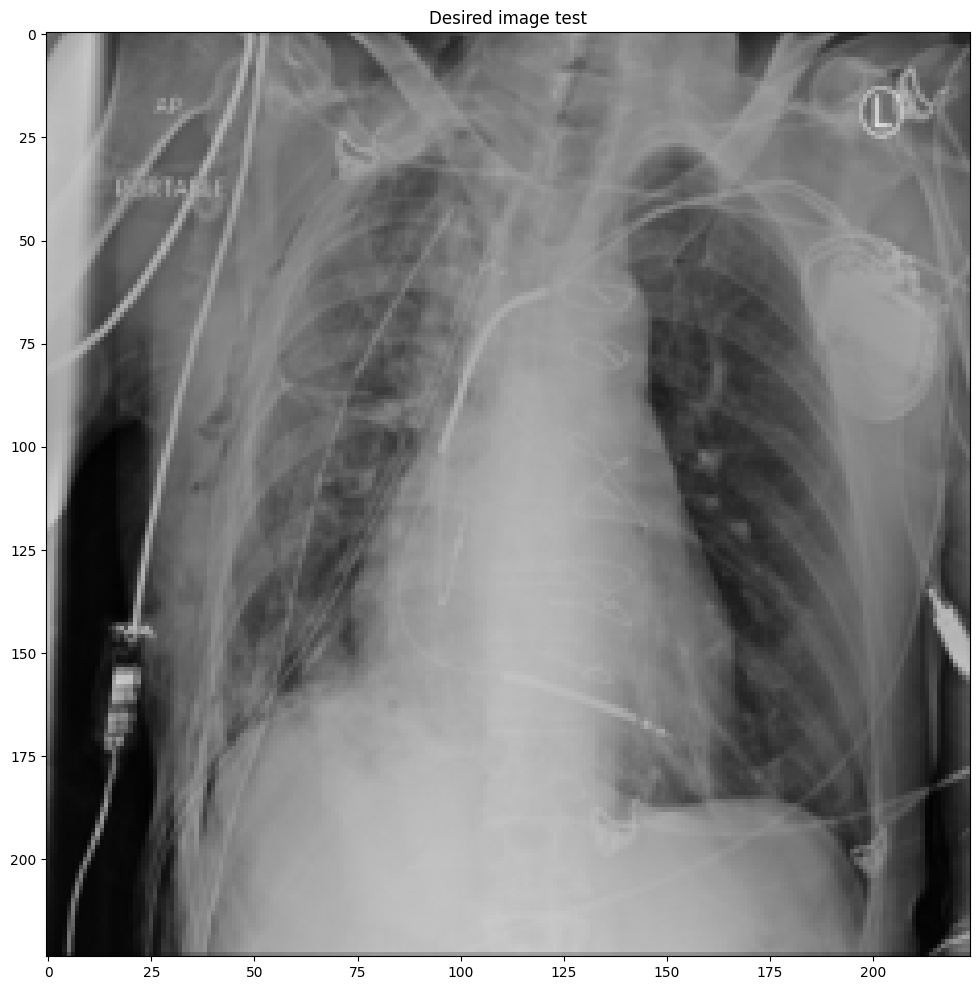

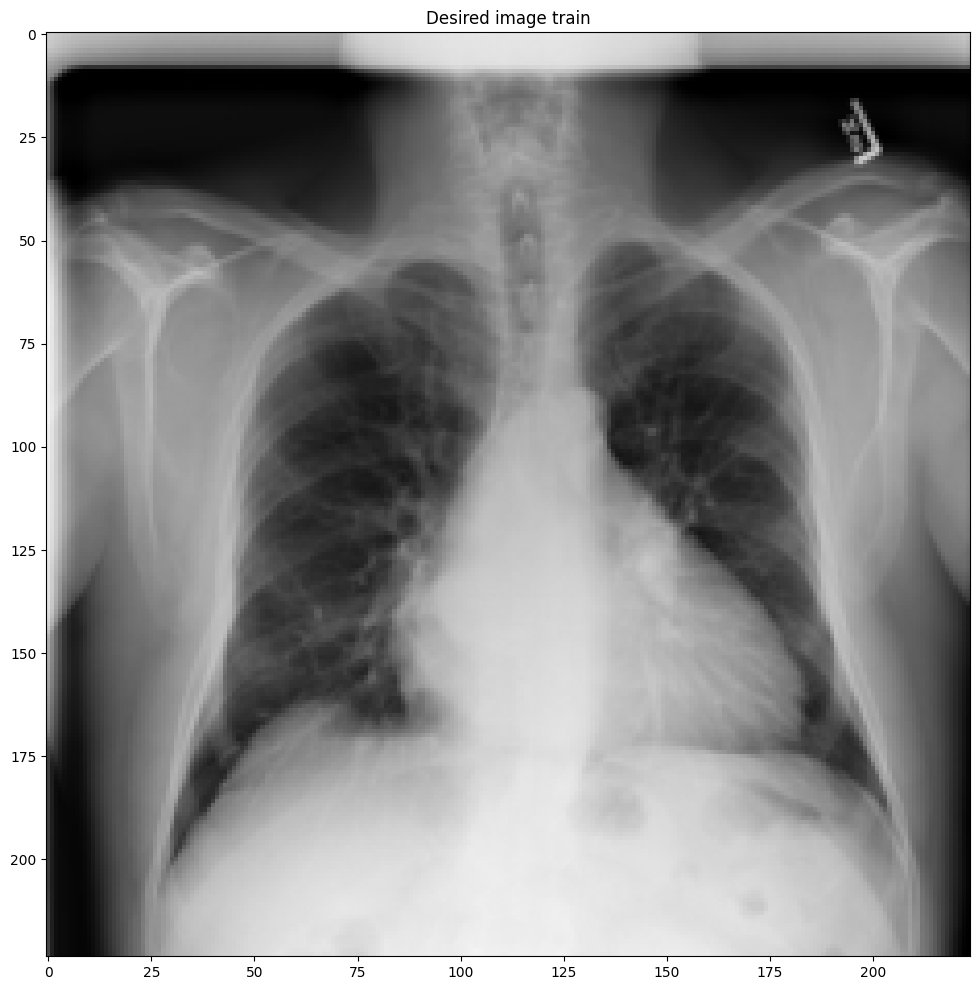

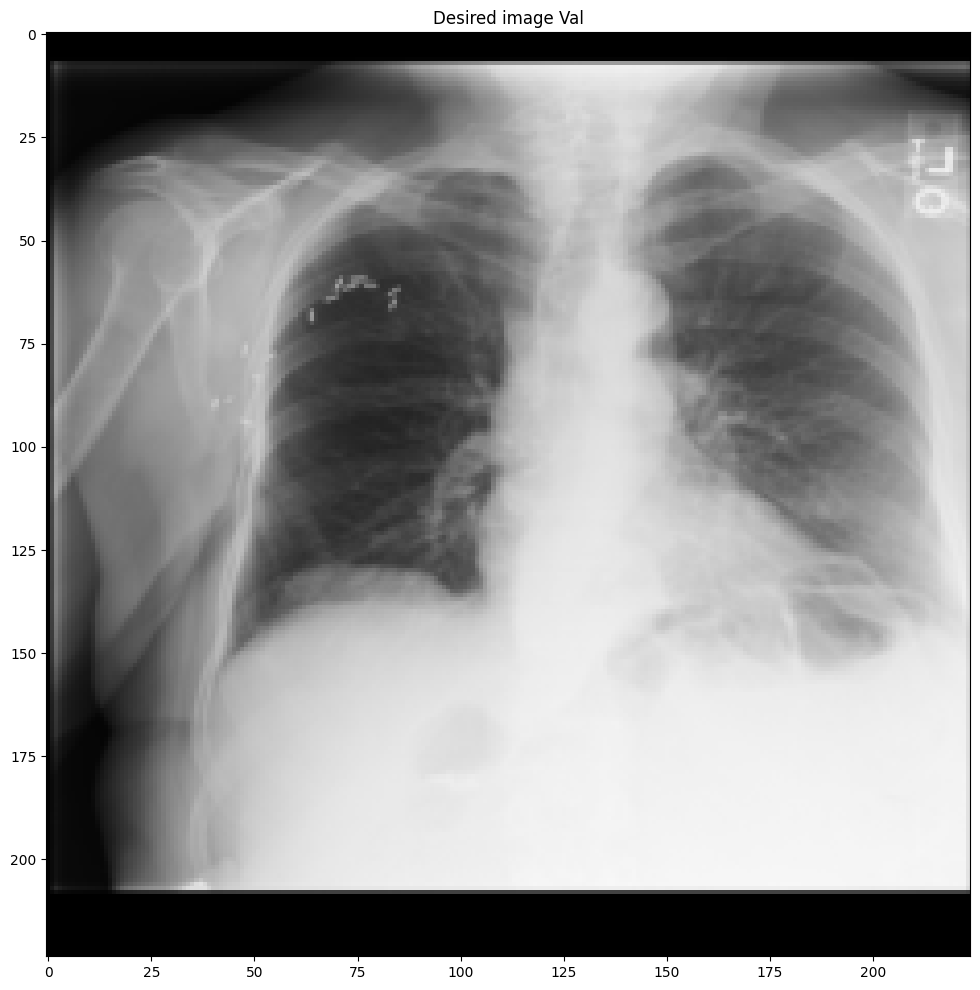

In [9]:
#Sampled images for test
samp1_image, label1 = test_dataset[1]
show_image(samp1_image, "test")
print("TEST LABELS")
print(label1)

#Sampled images for train
samp2_image, label2 = train_dataset[1]
show_image(samp2_image, "train")
print("TRAIN LABELS")
print(label2)

#Sampled images for val
samp3_image, label3 = val_dataset[2]
show_image(samp3_image, "Val")
print("VAL LABELS")
print(label3)